**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

**Pelvic Incidence -** Normal Range 43 deg to 62 deg

**Pelvic tilt -** Normal Range 3 deg to 18 deg

**Sacral slope** is -32 deg to -49 deg

**Lumbarlordosis** varies based on spine and pelvis and will be +/-10 of the pelvic incidence range

**Pelvic radius** angle is 16 deg to -24 deg

**Degree_spondylolisthesis** is 
    Grade 1 - 0 to 25%
    Grade 2- 26% to 50%.
    Grade 3 - 51% to 75%
    Grade 4 - 76% to 100%
    Grade 5 - Vertebrae is completely fallen

**Class** - Normal, Abnormal

# import data 2C_weka.csv for 2 Class Classifcation.


In [15]:
Class2_df = pd.read_csv('2classdata.csv')
Class2_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [16]:
Class2_df.shape # head and tail of the data

(310, 7)

In [17]:
Class2_df.info() # information on the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [18]:
Class2_df.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [19]:
Class2_df['class'] = Class2_df['class'].astype('category') # Converting the Class object to Category type
Class2_df.dtypes

pelvic_incidence             float64
pelvic_tilt numeric          float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
class                       category
dtype: object

In [20]:
Class2_df.describe().transpose() # Ranges of attribute vary and this is indication of possible outliers

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [21]:
#Class2_df['class'].nunique()
Class2_df.groupby(["class"]).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


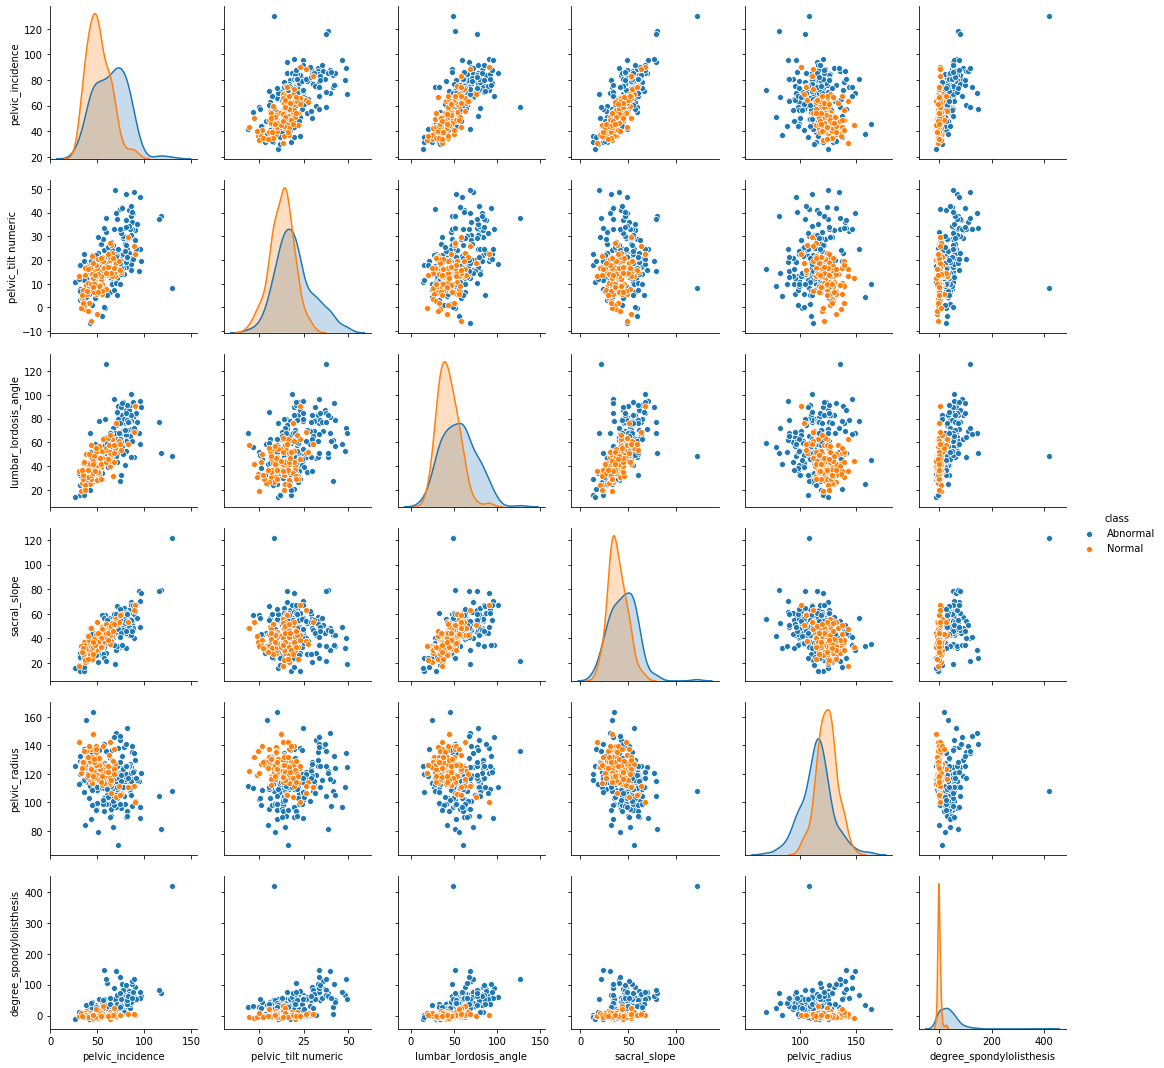

In [22]:
sns.pairplot(Class2_df, hue = 'class') # Visual Analysis of the Attributes with respect to Classes (Abnormal & Normal)

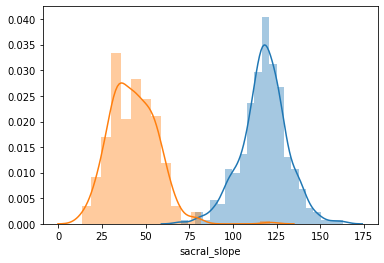

In [23]:
#sns.jointplot(x="pelvic_radius", y="sacral_slope", data=Class2_df);
sns.distplot(Class2_df['pelvic_radius'])
sns.distplot(Class2_df['sacral_slope'])

# Encode the Class variable to integer.

In [24]:
from sklearn.preprocessing import LabelEncoder
sns.set(style="ticks", color_codes=True)
lb_class = LabelEncoder()

In [25]:
Class2_df['class'] = lb_class.fit_transform(Class2_df["class"])

In [26]:
Class2_df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [27]:
Class2_target_df = Class2_df['class'] # Target Variable

In [28]:
Class2_feature_df = Class2_df.drop('class',axis=1) # Independent Variables

# Normalize your Data (X) to get values between 0 to 1.

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Class2_feature_df_scaled = scaler.fit_transform(Class2_feature_df)
Class2_feature_df_scaled = pd.DataFrame(Class2_feature_df_scaled)

In [30]:
Class2_feature_df_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,310.0,0.331276,0.166237,0.0,0.195613,0.313862,0.450685,1.0
1,310.0,0.430419,0.178762,0.0,0.307608,0.409251,0.512180,1.0
2,310.0,0.339450,0.166043,0.0,0.205831,0.318253,0.438509,1.0
3,310.0,0.273794,0.124216,0.0,0.184895,0.268714,0.363946,1.0
4,310.0,0.514452,0.143215,0.0,0.436900,0.518189,0.595613,1.0
5,310.0,0.086952,0.087428,0.0,0.029474,0.053133,0.121847,1.0


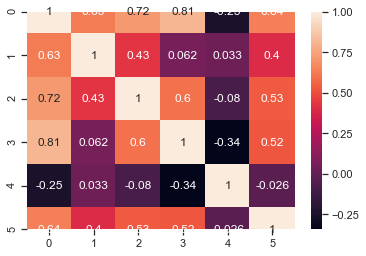

In [31]:
sns.heatmap(Class2_feature_df_scaled.corr(), annot=True) 
# Pelvic_radius has weak correlation with pelvic_incidence while others have a strong correlation

# Split the dat as train and test with a ratio of 70:30.

In [32]:
from sklearn.model_selection import train_test_split
X = np.array(Class2_feature_df_scaled)
print(X.shape)
y = np.array(Class2_target_df)
print(y.shape)

(310, 6)
(310,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 3, weights = 'distance', metric = 'euclidean')
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [35]:
y_pred = KNN.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [38]:
KNN.score(X_test, y_test)

0.7419354838709677

In [37]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))

[[52  7]
 [17 17]]


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [39]:
ac_scores = []
from sklearn import neighbors
for k in range(1, 51, 2):
    model = neighbors.KNeighborsClassifier(n_neighbors= k, weights = 'distance', metric = 'euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    ac_scores.append((score,k))
print("The max accuracy and optimal number of neighbour is {}".format(max(ac_scores)))

The max accuracy and optimal number of neighbour is (0.8172043010752689, 43)


In [40]:
ac_scores

[(0.7741935483870968, 1),
 (0.7419354838709677, 3),
 (0.7634408602150538, 5),
 (0.8172043010752689, 7),
 (0.7849462365591398, 9),
 (0.8172043010752689, 11),
 (0.8172043010752689, 13),
 (0.8172043010752689, 15),
 (0.8172043010752689, 17),
 (0.8172043010752689, 19),
 (0.8064516129032258, 21),
 (0.7956989247311828, 23),
 (0.7956989247311828, 25),
 (0.8064516129032258, 27),
 (0.7956989247311828, 29),
 (0.7956989247311828, 31),
 (0.8064516129032258, 33),
 (0.8064516129032258, 35),
 (0.8172043010752689, 37),
 (0.8172043010752689, 39),
 (0.8172043010752689, 41),
 (0.8172043010752689, 43),
 (0.8064516129032258, 45),
 (0.8064516129032258, 47),
 (0.7956989247311828, 49)]

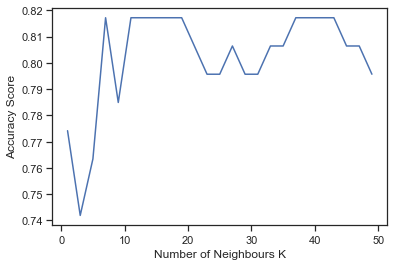

In [41]:
import matplotlib.pyplot as plt
score,k = zip(*ac_scores)
plt.plot(k,score)
plt.xlabel('Number of Neighbours K')
plt.ylabel('Accuracy Score')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

**Pelvic Incidence -** Normal Range 43 deg to 62 deg

**Pelvic tilt -** Normal Range 3 deg to 18 deg

**Sacral slope** is -32 deg to -49 deg

**Lumbarlordosis** varies based on spine and pelvis and will be +/-10 of the pelvic incidence range

**Pelvic radius** angle is 16 deg to -24 deg

**Degree_spondylolisthesis** is 
    Grade 1 - 0 to 25%
    Grade 2- 26% to 50%.
    Grade 3 - 51% to 75%
    Grade 4 - 76% to 100%
    Grade 5 - Vertebrae is completely fallen

**Class** - Hernia, Normal and Spondylolisthesis ( Target Variable)

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [43]:
Class3_df = pd.read_csv('3classdata.csv')
Class3_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [44]:
Class3_df.shape

(310, 7)

In [45]:
Class3_df.info() # information on the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [46]:
Class3_df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [47]:
Class3_df['class'] = Class3_df['class'].astype('category')
Class3_df.dtypes

pelvic_incidence             float64
pelvic_tilt                  float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
class                       category
dtype: object

In [48]:
Class3_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [49]:
Class3_df.groupby(["class"]).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


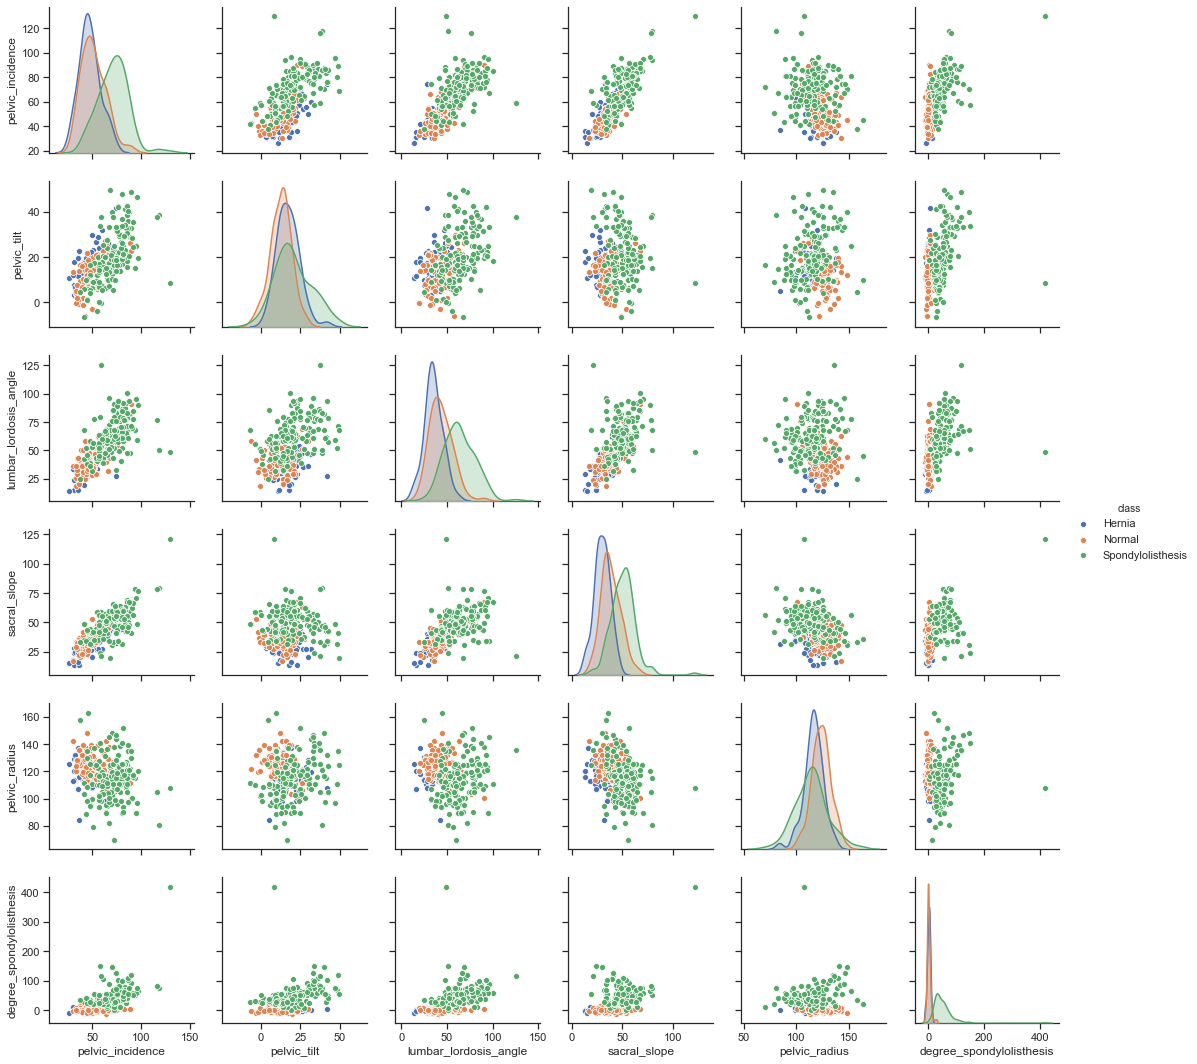

In [50]:
sns.pairplot(Class3_df, hue = 'class')

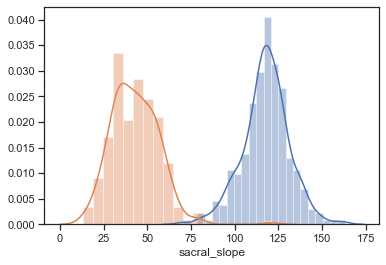

In [51]:
sns.distplot(Class3_df['pelvic_radius'])
sns.distplot(Class3_df['sacral_slope'])

In [52]:
from sklearn.preprocessing import LabelEncoder
sns.set(style="ticks", color_codes=True)
lb_class = LabelEncoder()
Class3_df['class'] = lb_class.fit_transform(Class3_df["class"])

In [53]:
Class3_target_df = Class3_df['class']

In [54]:
Class3_feature_df = Class3_df.drop('class',axis=1)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Class3_feature_df_scaled = scaler.fit_transform(Class3_feature_df)
Class3_feature_df_scaled = pd.DataFrame(Class3_feature_df_scaled)

In [56]:
Class3_feature_df_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,310.0,0.331276,0.166237,0.0,0.195613,0.313862,0.450685,1.0
1,310.0,0.430419,0.178762,0.0,0.307608,0.409251,0.512180,1.0
2,310.0,0.339450,0.166043,0.0,0.205831,0.318253,0.438509,1.0
3,310.0,0.273794,0.124216,0.0,0.184895,0.268714,0.363946,1.0
4,310.0,0.514452,0.143215,0.0,0.436900,0.518189,0.595613,1.0
5,310.0,0.086952,0.087428,0.0,0.029474,0.053133,0.121847,1.0


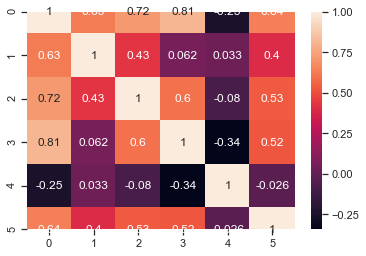

In [57]:
sns.heatmap(Class3_feature_df_scaled.corr(), annot=True)

In [58]:
from sklearn.model_selection import train_test_split
X = np.array(Class3_feature_df_scaled)
print(X.shape)
y = np.array(Class3_target_df)
print(y.shape)

(310, 6)
(310,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 5, weights = 'distance', metric = 'euclidean')
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [61]:
y_pred = KNN.predict(X_test)

In [62]:
KNN.score(X_test, y_test)

0.7311827956989247

In [63]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))

[[ 6  4  1]
 [10 20  4]
 [ 4  2 42]]


In [64]:
ac_scores = []
from sklearn import neighbors
for k in range(1, 51, 2):
    model = neighbors.KNeighborsClassifier(n_neighbors= k,weights = 'distance', metric = 'euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    ac_scores.append((score,k))
print("The max accuracy and optimal number of neighbour is {}".format(max(ac_scores)))

The max accuracy and optimal number of neighbour is (0.8172043010752689, 49)


In [65]:
ac_scores

[(0.7311827956989247, 1),
 (0.7096774193548387, 3),
 (0.7311827956989247, 5),
 (0.7419354838709677, 7),
 (0.7634408602150538, 9),
 (0.7956989247311828, 11),
 (0.7849462365591398, 13),
 (0.7956989247311828, 15),
 (0.7741935483870968, 17),
 (0.7741935483870968, 19),
 (0.7849462365591398, 21),
 (0.7956989247311828, 23),
 (0.7956989247311828, 25),
 (0.7956989247311828, 27),
 (0.7956989247311828, 29),
 (0.7956989247311828, 31),
 (0.7956989247311828, 33),
 (0.7849462365591398, 35),
 (0.7849462365591398, 37),
 (0.7956989247311828, 39),
 (0.8064516129032258, 41),
 (0.8172043010752689, 43),
 (0.8064516129032258, 45),
 (0.8172043010752689, 47),
 (0.8172043010752689, 49)]

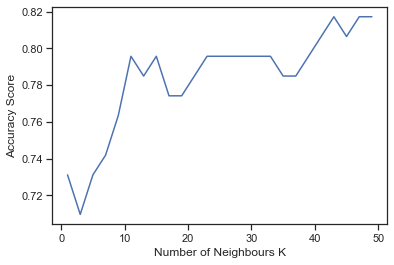

In [66]:
import matplotlib.pyplot as plt
score,k = zip(*ac_scores)
plt.plot(k,score)
plt.xlabel('Number of Neighbours K')
plt.ylabel('Accuracy Score')
plt.show()